In [1]:
#import required lib
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
#Train test Split
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

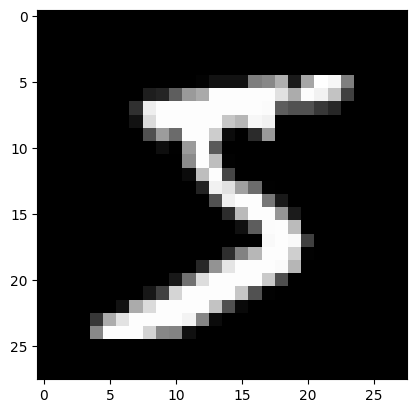

In [4]:

plt.imshow(x_train[0], cmap='gray')
plt.show()

In [5]:
# pixel
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [6]:
# check shaps
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [7]:
# re sizeing
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')

In [8]:
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [9]:
# to categorical
num_classes = 10
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [10]:

model = Sequential()

model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [11]:
# for better training(Epochs = Iteration)
batch_size = 128
epochs = 5
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

Epoch 1/5
469/469 [==============================] - 25s 47ms/step - loss: 0.2584 - accuracy: 0.9213 - val_loss: 0.1162 - val_accuracy: 0.9661
Epoch 2/5
469/469 [==============================] - 11s 24ms/step - loss: 0.1041 - accuracy: 0.9688 - val_loss: 0.0851 - val_accuracy: 0.9752
Epoch 3/5
469/469 [==============================] - 8s 17ms/step - loss: 0.0723 - accuracy: 0.9774 - val_loss: 0.0762 - val_accuracy: 0.9775
Epoch 4/5
469/469 [==============================] - 8s 17ms/step - loss: 0.0578 - accuracy: 0.9820 - val_loss: 0.0623 - val_accuracy: 0.9816
Epoch 5/5
469/469 [==============================] - 8s 17ms/step - loss: 0.0478 - accuracy: 0.9846 - val_loss: 0.0615 - val_accuracy: 0.9818


In [12]:
#loss , Accu
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.061459727585315704
Test accuracy: 0.9818000197410583


In [13]:
from PIL import Image

# resizing reshaping converting
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((28, 28),resample=Image.LANCZOS)
    img = img.convert('L')
    plt.imshow(img)
    img = np.array(img) / 255.0
    img = img.reshape((1, 784))
    return img

In [19]:
# input_image1 = preprocess_image('predict.png')
# #prediction
# prediction = model.predict(input_image1,verbose=0)
# print("The number is:",np.argmax(prediction))

The number is: 7


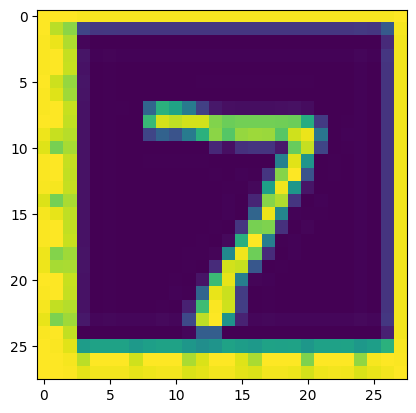

In [18]:
input_image5 = preprocess_image('/content/7.png')
#prediction
prediction = model.predict(input_image5,verbose=0)
print("The number is:",np.argmax(prediction))